<a href="https://colab.research.google.com/github/dariamm03/Machine_Learning/blob/main/MachineLearning14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание
Необходимо обучить модель детекции объектов на изображении, например, нейросетевую модель YOLO (You Only Look Once). Необходимо взять датасет содержащий 2D изображения из источника, попробовать обучить на нём модель детекции и проверить работу модели на тестовой выборке.
Для обучения и тестирования модели можно использовать COCO DataSet (https://cocodataset.org/) с не менее чем 100 изображениями для обучения и не менее чем с 30 изображениями для тестирования.

In [ ]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.5/660.5 kB 5.9 MB/s eta 0:00:00


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.2/107.7 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstall

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="7kDmTgS3bfgpA5VBb0bO")
project = rf.workspace("roboflow-100").project("animals-ij5d2")
dataset = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.227, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to animals-2 in yolov8:: 100%|██████████| 2012/2012 [00:00<00:00, 3263.27it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=20 imgsz=200 plots=True

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/animals-2/data.yaml, epochs=20, patience=50, batch=16, imgsz=200, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchs

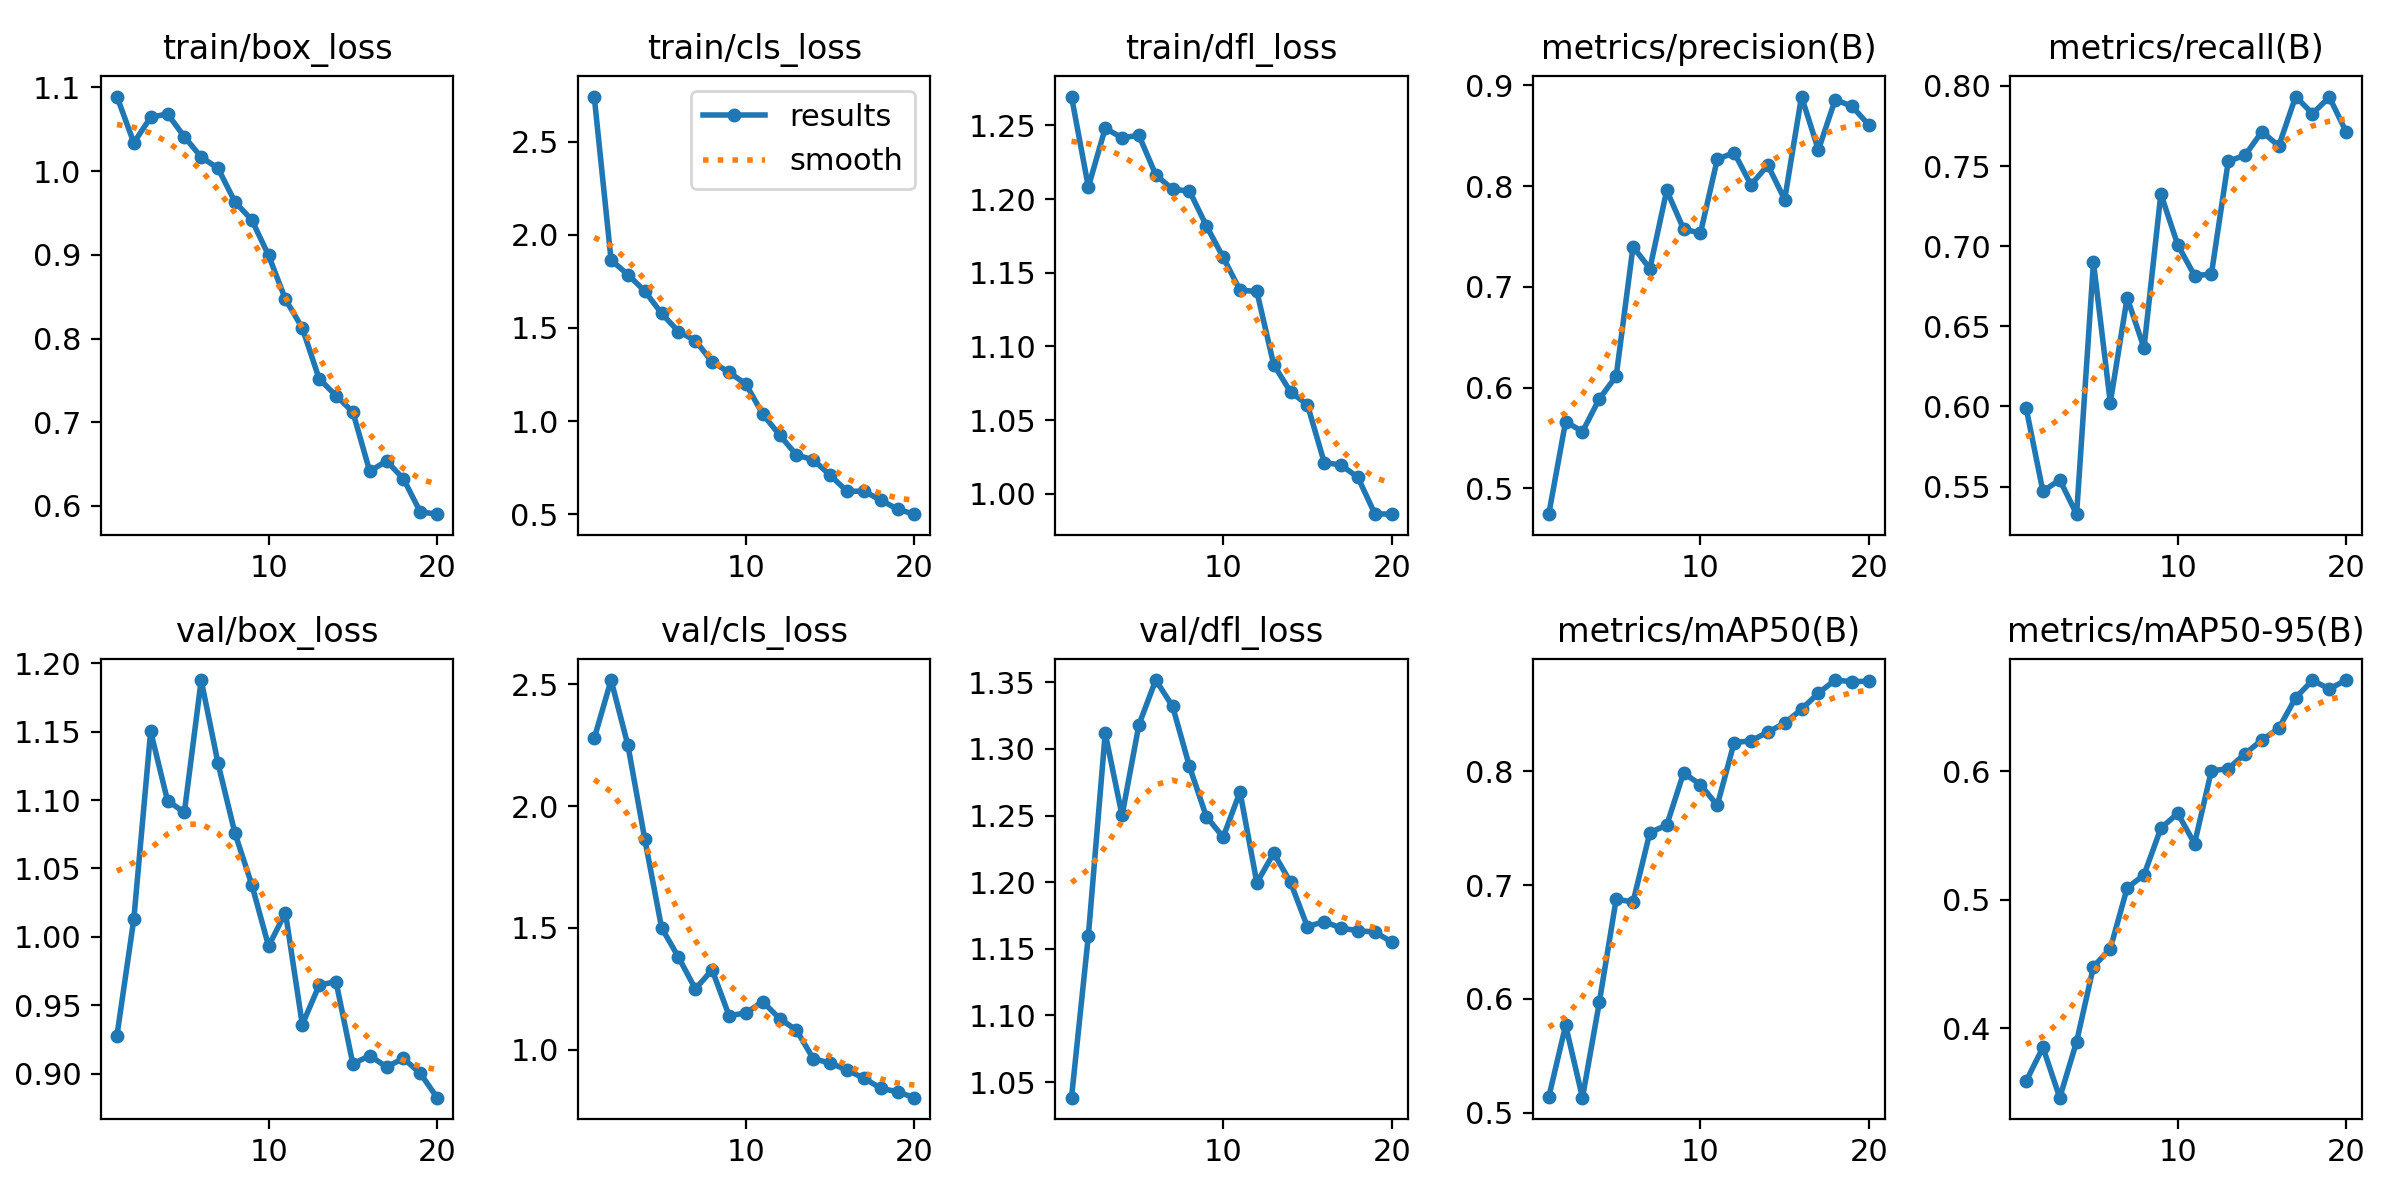

In [ ]:
#результаты тренировки
Image(filename=f'/content/runs/detect/train8/results.png', width=1000)

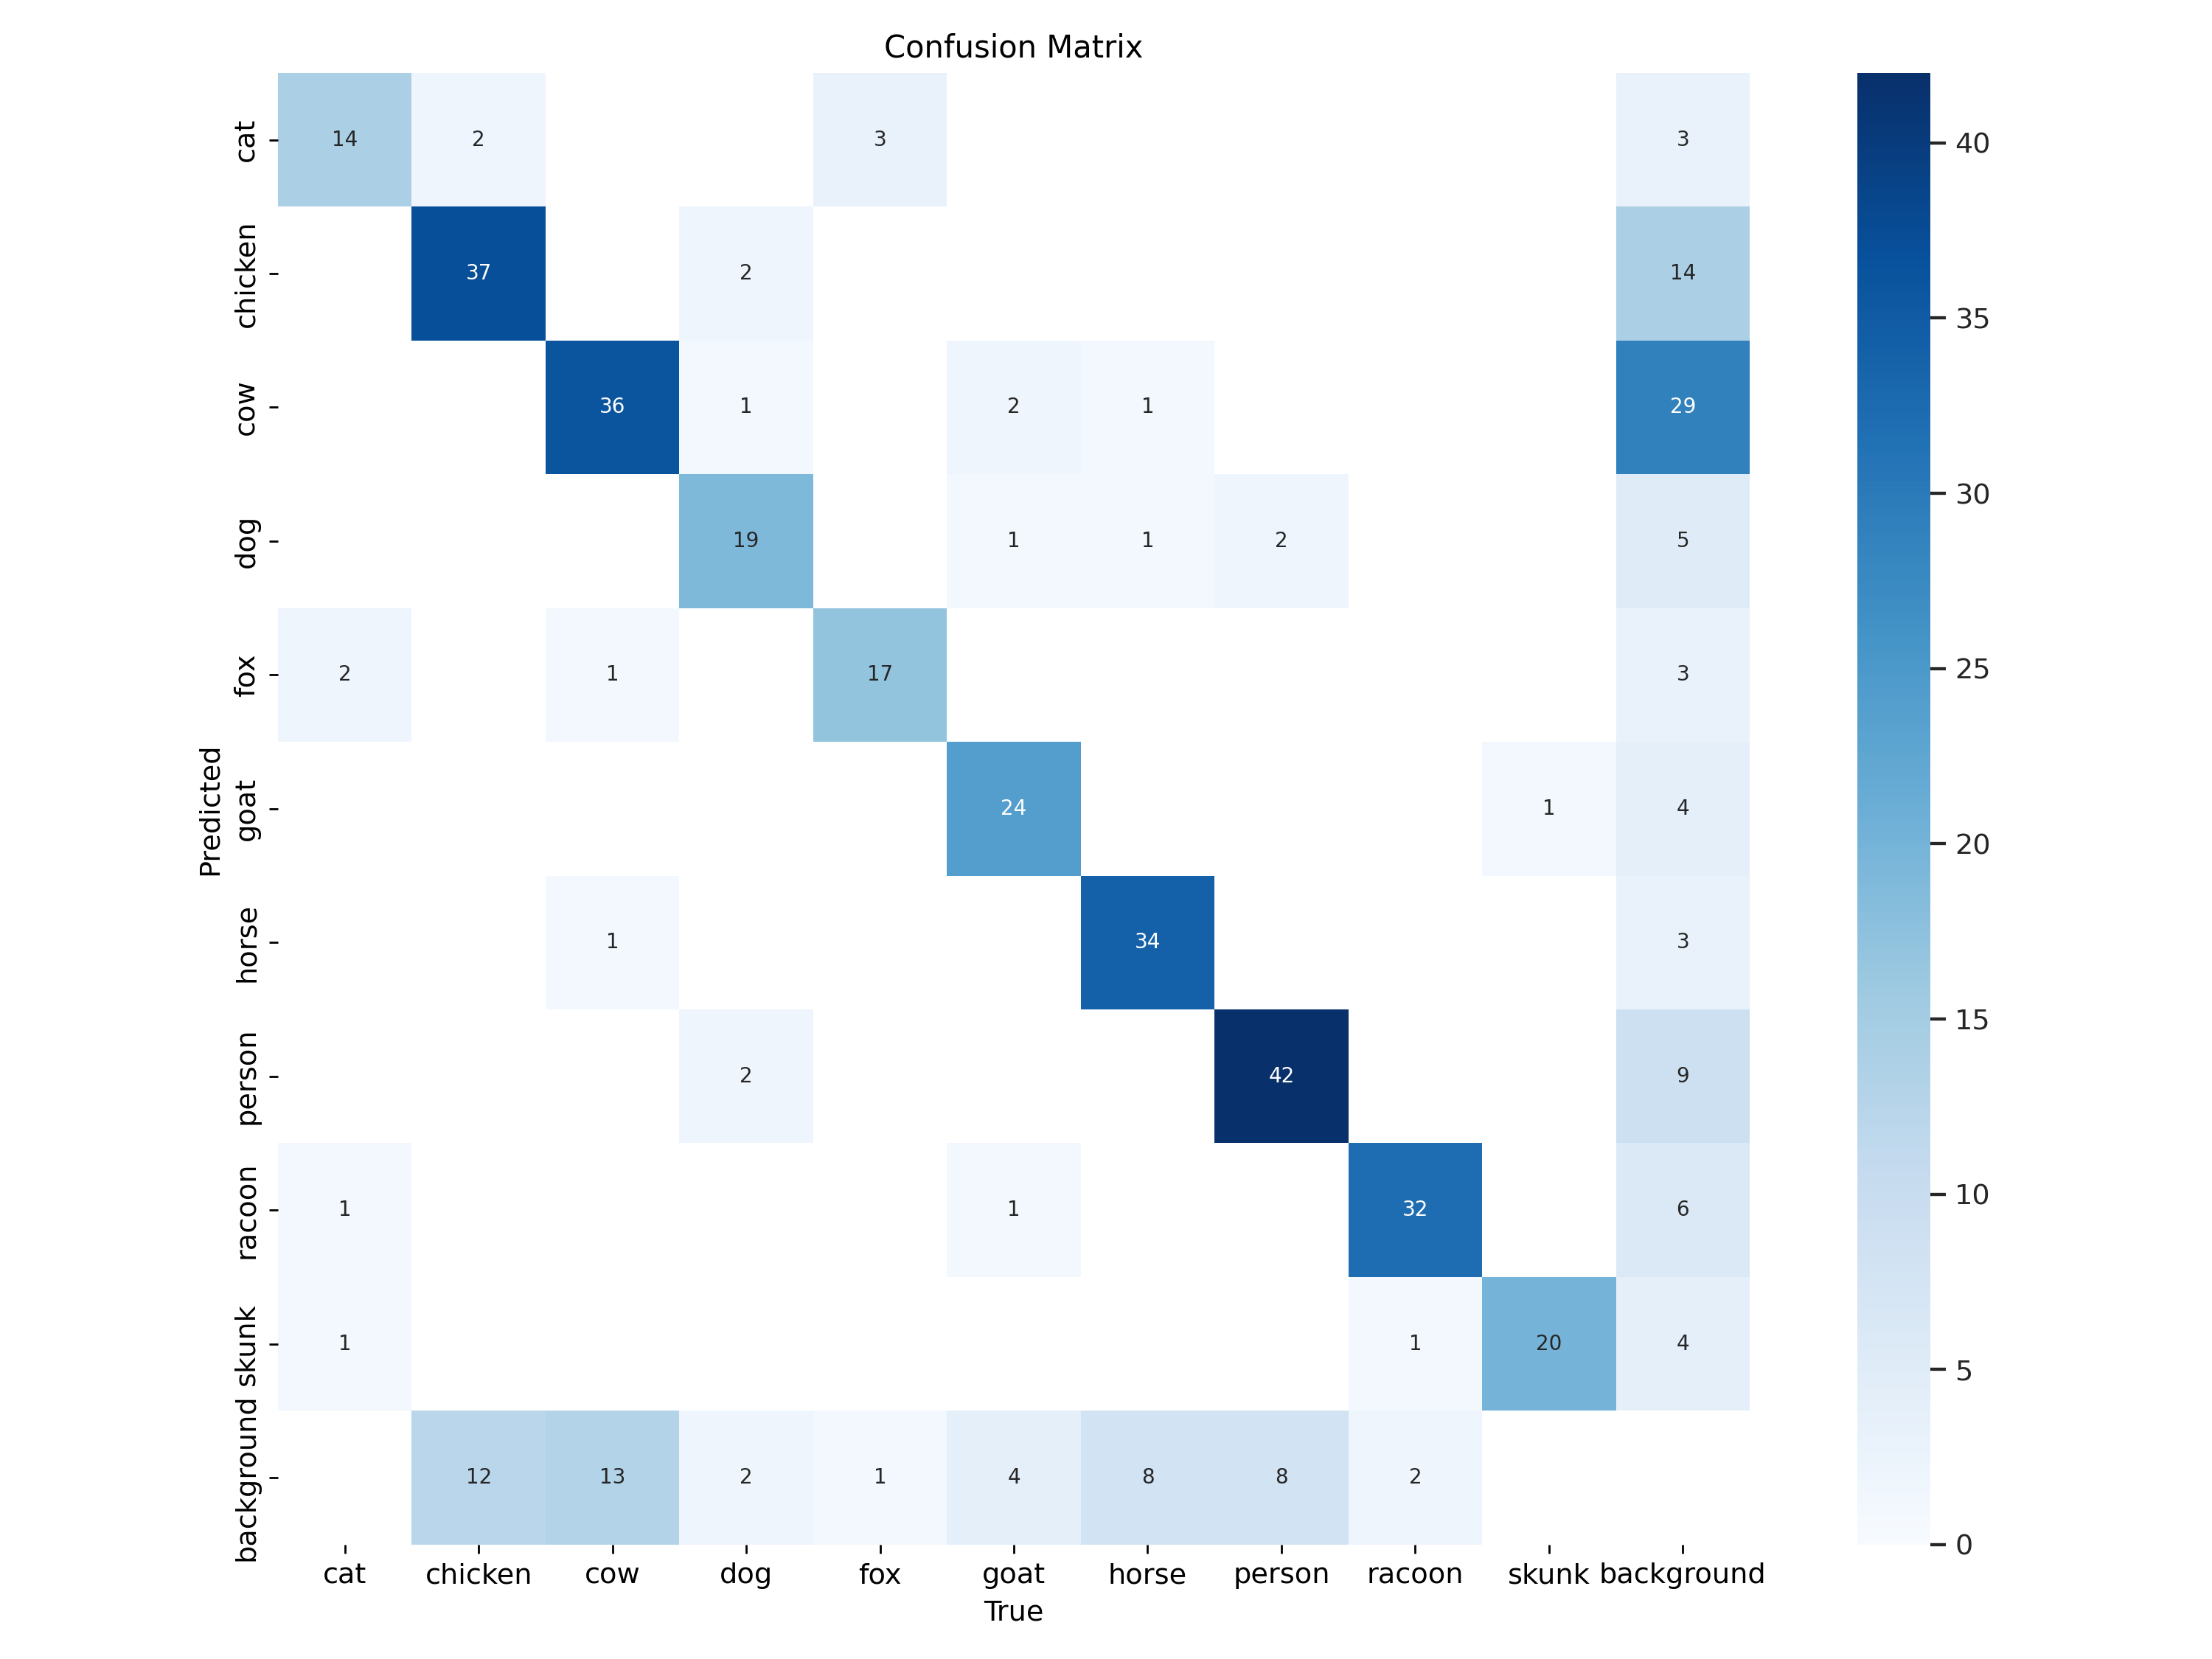

In [ ]:
# Выведем confusion matrix
Image(filename=f'/content/runs/detect/train8/confusion_matrix.png', width=800)

In [ ]:
# валидация
!yolo task=detect mode=val model=/content/runs/detect/train8/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/animals-2/valid/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100% 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 13/13 [00:19<00:00,  1.52s/it]
                   all        200        351      0.886      0.768      0.881      0.671
                   cat        200         18      0.819      0.756      0.868      0.668
               chicken        200         51      0.883      0.608      0.786      0.526
                   cow        200         51      0.834      0.691      0.704      0.485
                   dog        200         26      0.928      0.769      0.918      0.768
                   fox        200         21      0.837      0.732      0.859      0.686
                  goat        200         32      0

In [ ]:
#предсказания на тестовой выборке
!yolo task=detect mode=predict model=/content/runs/detect/train8/weights/best.pt conf=0.25 source={dataset.location}/test/images

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs

image 1/100 /content/animals-2/test/images/1000_jpg.rf.884968f09695e4a51b03989a0de3945e.jpg: 192x224 1 horse, 2 persons, 137.3ms
image 2/100 /content/animals-2/test/images/107_jpg.rf.cde52d96d00fd611d4c474f3f461531a.jpg: 160x224 1 skunk, 75.8ms
image 3/100 /content/animals-2/test/images/11_jpg.rf.24a3119114e678ee91ba46184778a620.jpg: 192x224 1 fox, 75.4ms
image 4/100 /content/animals-2/test/images/122_jpg.rf.9eb762789b8f23ba4026abe5fdca5b80.jpg: 192x224 1 skunk, 84.7ms
image 5/100 /content/animals-2/test/images/124_jpg.rf.c7c76758f6f7a9ebf40e7e07846e2f06.jpg: 224x224 1 skunk, 99.7ms
image 6/100 /content/animals-2/test/images/128_jpg.rf.7da422e5284716b9bed69611802aacda.jpg: 224x224 1 skunk, 84.0ms
image 7/100 /content/animals-2/test/images/12_jpg.rf.faf6cc599e50356a41e7ffa3b4ea3893.jpg: 192x224 1 fox, 78.4ms
image 8/100 /c

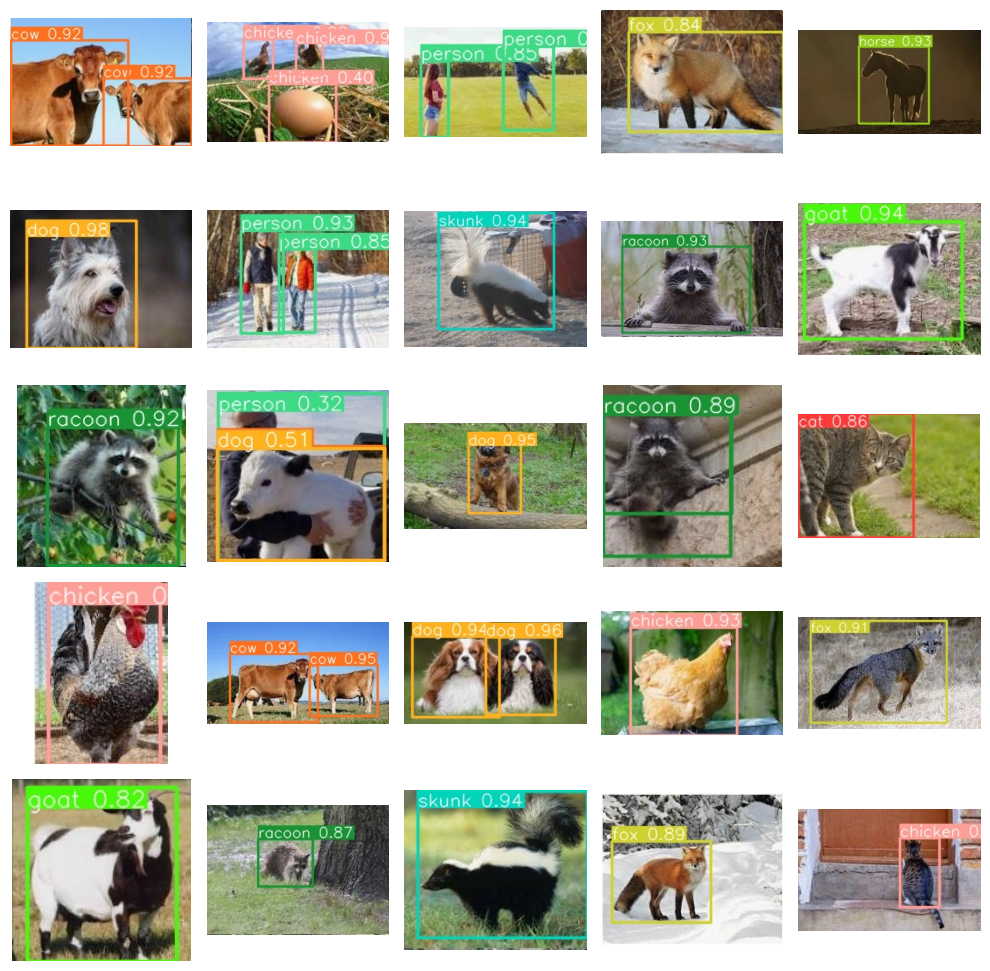

In [ ]:
import matplotlib.pyplot as plt
import os

# Создание сетки изображений
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

# Загрузка и отображение каждой картинки
image_files = os.listdir(f'/content/runs/detect/predict2')

for i, ax in enumerate(axes.flat):
    image = plt.imread(f'/content/runs/detect/predict2/{image_files[i]}')
    ax.imshow(image)
    ax.axis('off')

# Отображение сетки изображений
plt.tight_layout()
plt.show()

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train8/weights/best.pt conf=0.25 source='/content/capi.jpg' save=True

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /content/capi.jpg: 192x224 1 racoon, 135.8ms
Speed: 1.3ms preprocess, 135.8ms inference, 1.9ms postprocess per image at shape (1, 3, 192, 224)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


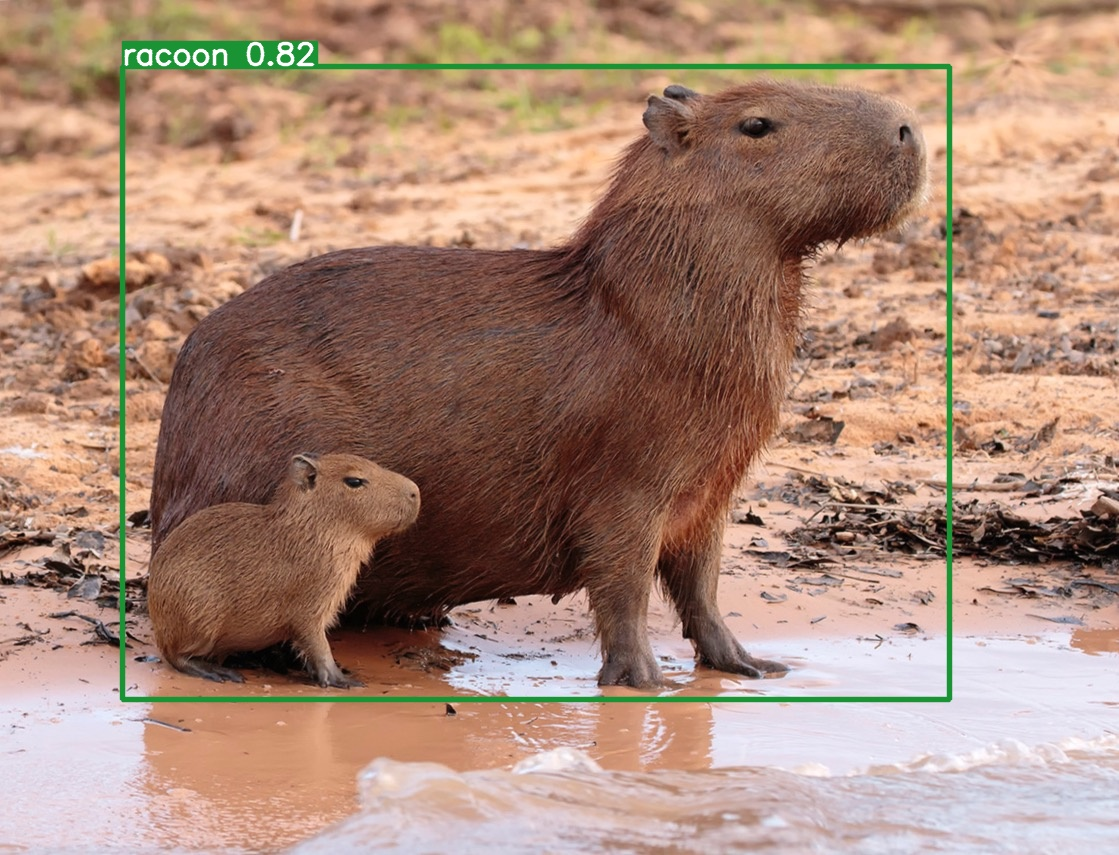

In [ ]:
Image(filename='/content/runs/detect/predict3/capi.jpg', height=600)

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train8/weights/best.pt conf=0.25 source='/content/ryjik.jpg' save=True

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /content/ryjik.jpg: 224x128 1 cow, 195.9ms
Speed: 1.1ms preprocess, 195.9ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 128)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


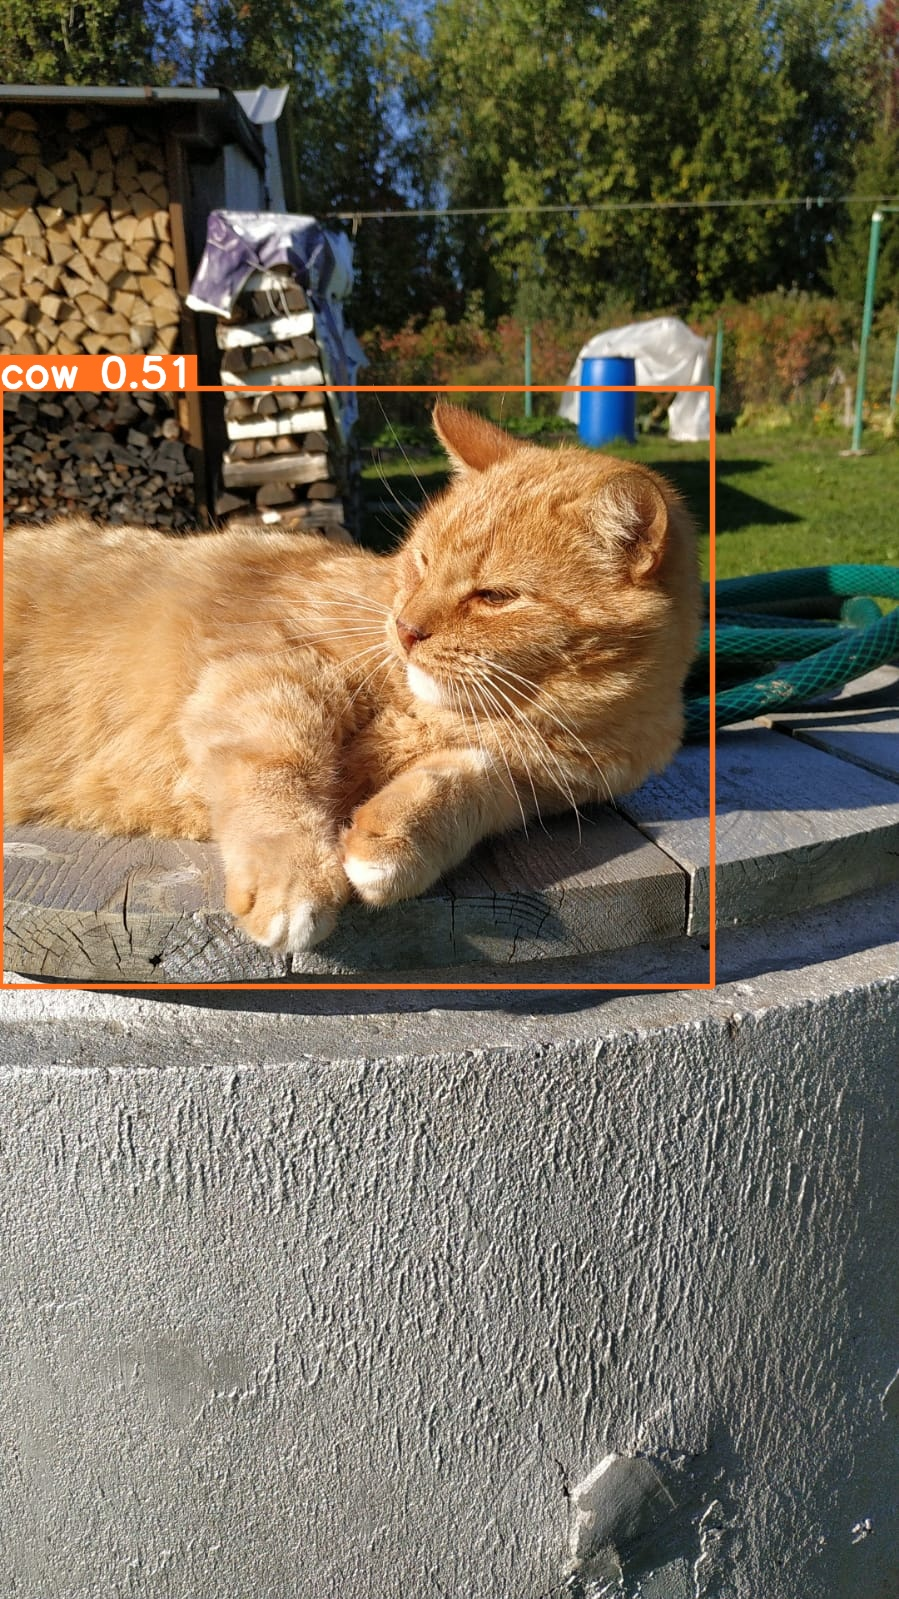

In [ ]:
Image(filename='/content/runs/detect/predict4/ryjik.jpg', height=600)

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train8/weights/best.pt conf=0.25 source='/content/twocat.jpg' save=True

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /content/twocat.jpg: 128x224 1 fox, 1 skunk, 99.7ms
Speed: 1.1ms preprocess, 99.7ms inference, 1.9ms postprocess per image at shape (1, 3, 128, 224)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


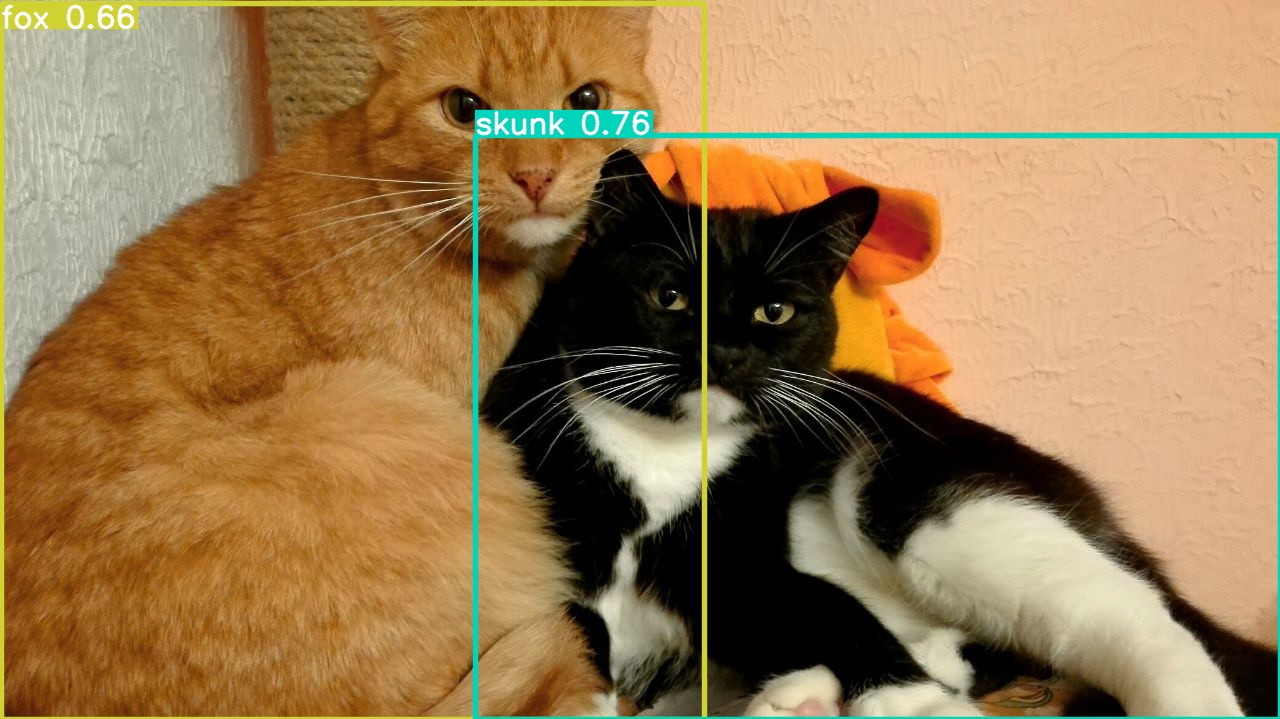

In [ ]:
Image(filename='/content/runs/detect/predict5/twocat.jpg', height=600)

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train8/weights/best.pt conf=0.25 source='/content/fox.jpeg' save=True

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /content/fox.jpeg: 224x128 1 fox, 101.9ms
Speed: 1.2ms preprocess, 101.9ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 128)
Results saved to runs/detect/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


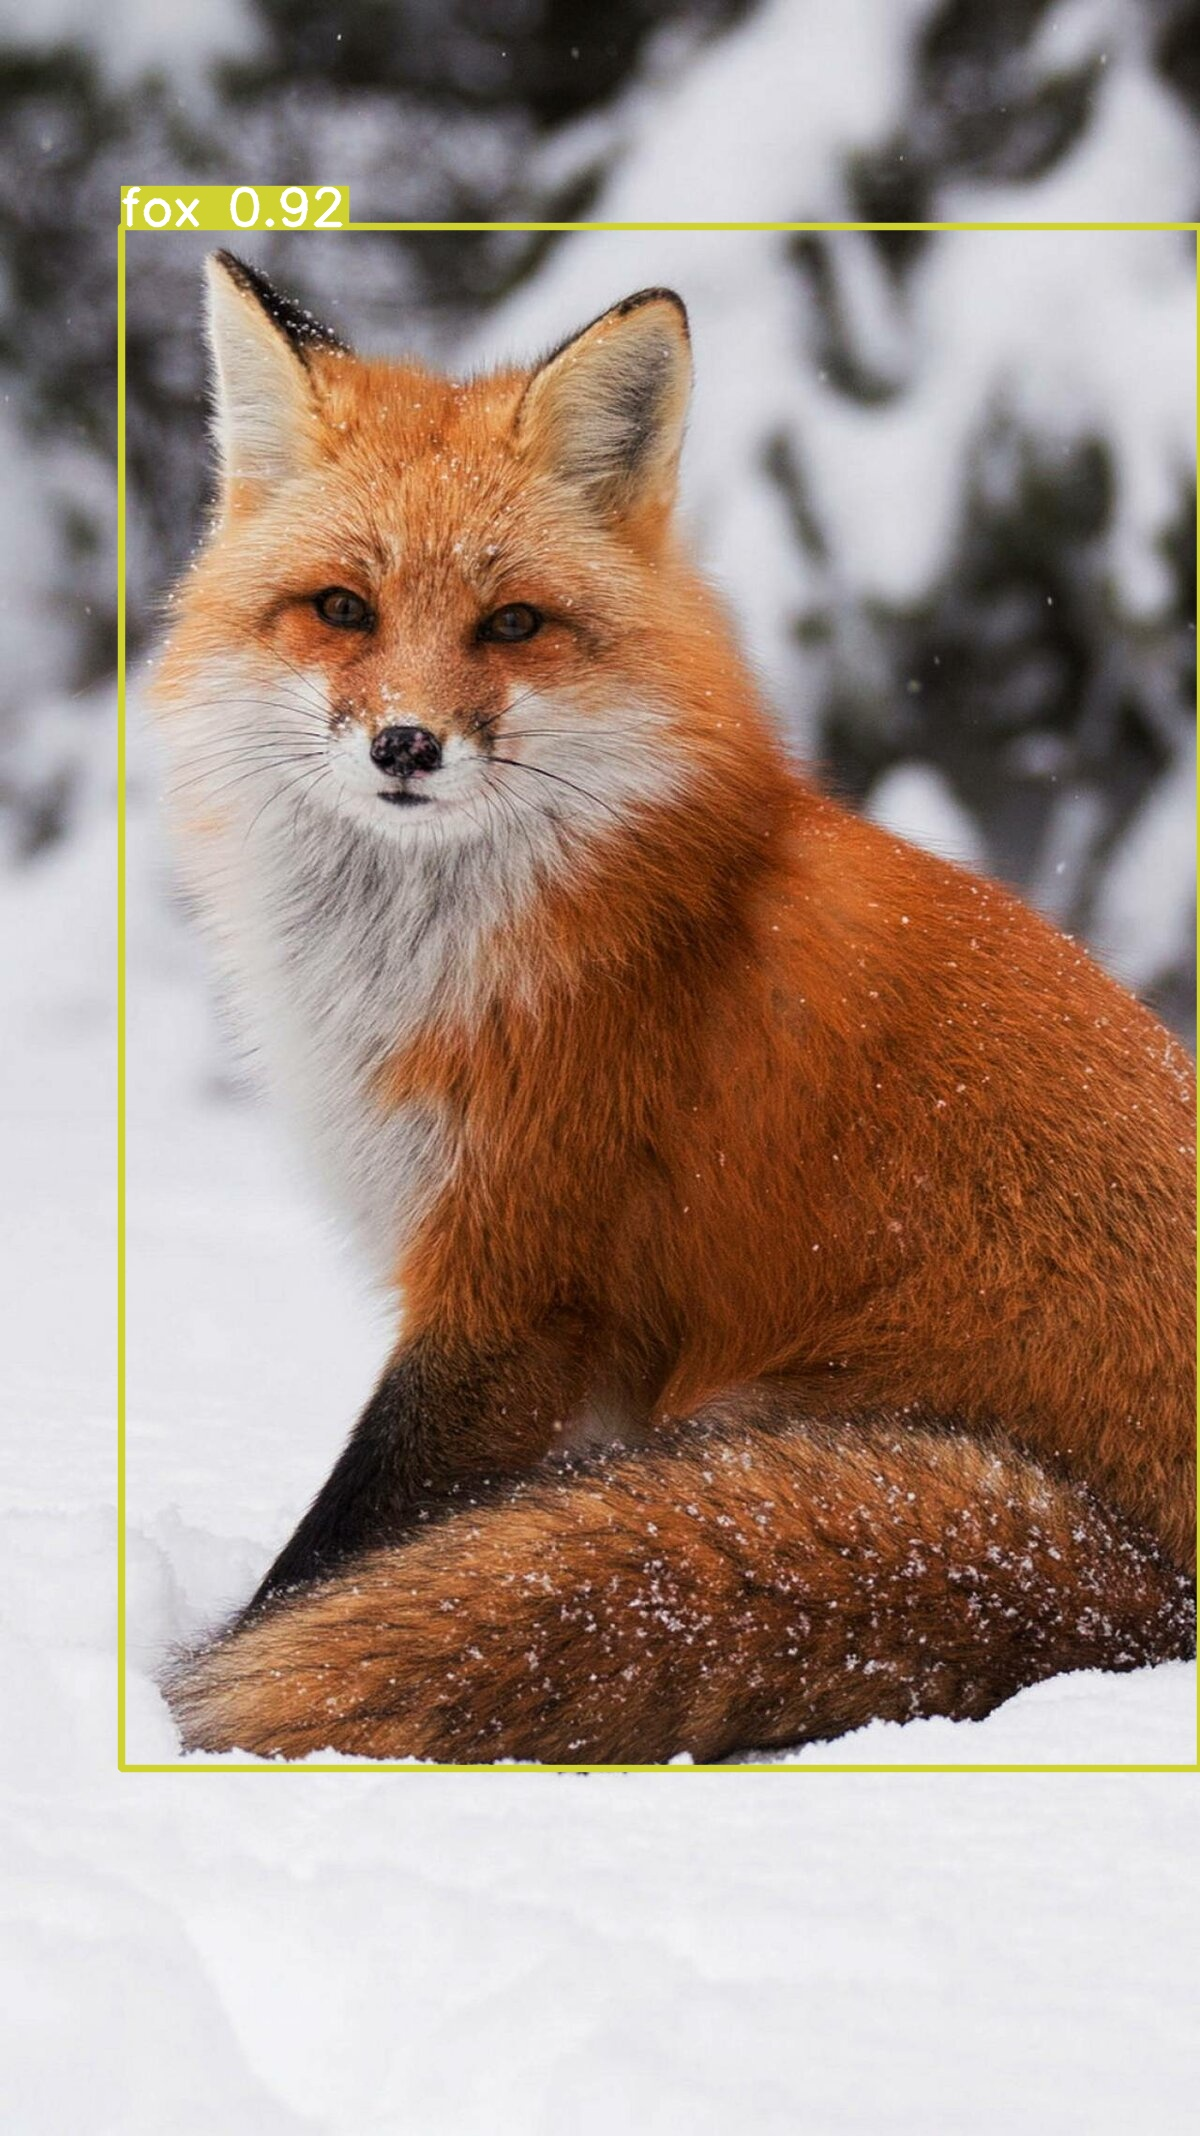

In [ ]:
Image(filename='/content/runs/detect/predict6/fox.jpeg', height=600)